In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

data_dir = './data/ECG_image/train'
data_dir = pathlib.Path(data_dir)
data_valid_dir = './data/ECG_image/validation'

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8497


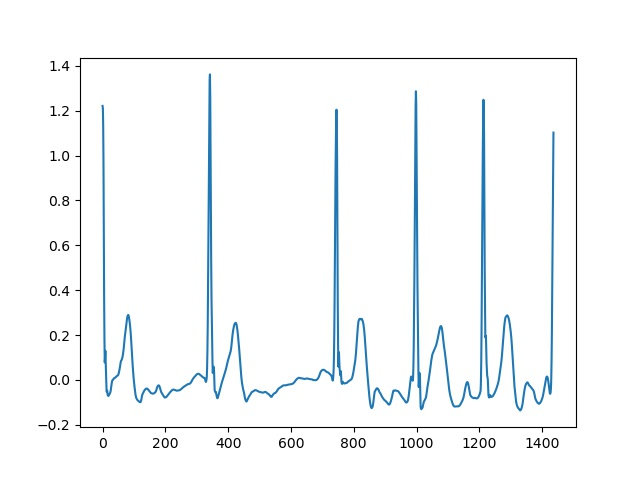

In [4]:
af = list(data_dir.glob('A/*'))
PIL.Image.open(str(af[0]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8497 files belonging to 4 classes.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 297 files belonging to 4 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['A', 'N', 'O', '~']


In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [25]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
266/266 [==============================] - 8s 14ms/step - loss: 1.0016 - accuracy: 0.5894 - val_loss: 1.0952 - val_accuracy: 0.5455
Epoch 2/10
266/266 [==============================] - 3s 12ms/step - loss: 0.8539 - accuracy: 0.6267 - val_loss: 0.9417 - val_accuracy: 0.5960
Epoch 3/10
266/266 [==============================] - 3s 12ms/step - loss: 0.8058 - accuracy: 0.6542 - val_loss: 0.9206 - val_accuracy: 0.6027
Epoch 4/10
266/266 [==============================] - 3s 12ms/step - loss: 0.7719 - accuracy: 0.6656 - val_loss: 0.8498 - val_accuracy: 0.6397
Epoch 5/10
266/266 [==============================] - 3s 12ms/step - loss: 0.7402 - accuracy: 0.6864 - val_loss: 0.8154 - val_accuracy: 0.6498
Epoch 6/10
266/266 [==============================] - 3s 12ms/step - loss: 0.7002 - accuracy: 0.7041 - val_loss: 0.7341 - val_accuracy: 0.7138
Epoch 7/10
266/266 [==============================] - 3s 12ms/step - loss: 0.6450 - accuracy: 0.7332 - val_loss: 0.6295 - val_accuracy: 0.7677

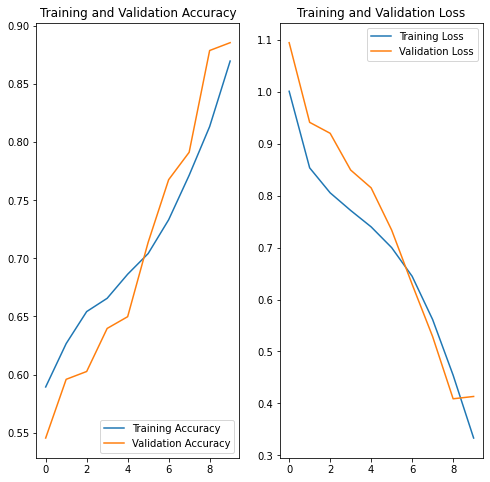

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )

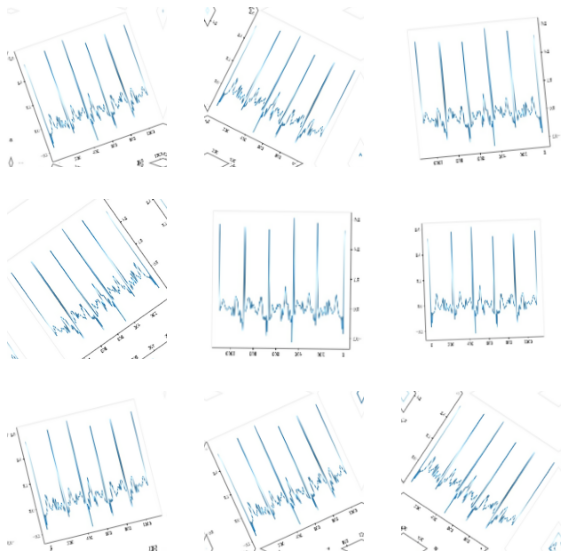

In [19]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [26]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [29]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
266/266 [==============================] - 5s 16ms/step - loss: 1.0740 - accuracy: 0.5859 - val_loss: 1.2457 - val_accuracy: 0.5051
Epoch 2/15
266/266 [==============================] - 4s 15ms/step - loss: 1.0026 - accuracy: 0.5926 - val_loss: 1.2583 - val_accuracy: 0.5051
Epoch 3/15
266/266 [==============================] - 4s 15ms/step - loss: 0.9970 - accuracy: 0.5926 - val_loss: 1.3138 - val_accuracy: 0.5051
Epoch 4/15
266/266 [==============================] - 4s 15ms/step - loss: 0.9906 - accuracy: 0.5926 - val_loss: 1.2270 - val_accuracy: 0.5051
Epoch 5/15
266/266 [==============================] - 4s 15ms/step - loss: 0.9490 - accuracy: 0.5933 - val_loss: 1.2405 - val_accuracy: 0.5051
Epoch 6/15
266/266 [==============================] - 4s 15ms/step - loss: 0.9365 - accuracy: 0.5966 - val_loss: 1.1473 - val_accuracy: 0.5152
Epoch 7/15
266/266 [==============================] - 4s 15ms/step - loss: 0.9242 - accuracy: 0.5987 - val_loss: 1.1609 - val_accuracy: 0.5152

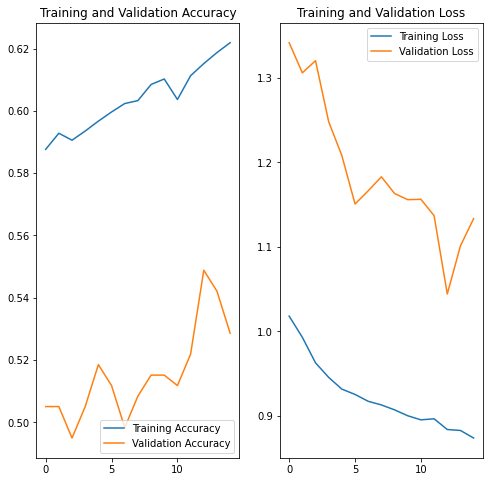

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()